Write the code needed to produce a report that provides the following information:
* Compare the average income based on ethnicity.
* On average, do married or single people have a higher balance?
* What is the highest income in our dataset?
* What is the lowest income in our dataset?
* How many cards do we have recorded in our dataset? (Hint: use `sum()`)
* How many females do we have information for vs how many males? (Hint: use `count()` for a list of all methods for computation of descriptive stats, explore the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats)).

In [355]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt

In [356]:
# Create a DataFrame with balance.txt
df = pd.read_csv('balance.txt',sep=' ')
df.head()

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,12.240798,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian
1,23.283334,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian
2,22.530409,104.593,7075,514,4,71,11,Male,No,No,Asian
3,27.652811,148.924,9504,681,3,36,11,Female,No,No,Asian
4,16.893978,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian


In [357]:
df.shape

(400, 11)

In [358]:
df.isna().sum()

Balance      0
Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
dtype: int64

Compare the average income based on ethnicity.

In [359]:
df.columns

Index(['Balance', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity'],
      dtype='object')

In [360]:
# Grouping the ethnicities and finding the average
ethnicity_average = df.groupby('Ethnicity').mean(numeric_only=True)

# Only having the Income column
ethnicity_average.drop(['Balance', 'Limit', 'Rating', 'Cards', 'Age', 'Education'], inplace=True, axis=1)

print(ethnicity_average)

                     Income
Ethnicity                  
African American  47.682101
Asian             44.187833
Caucasian         44.521945


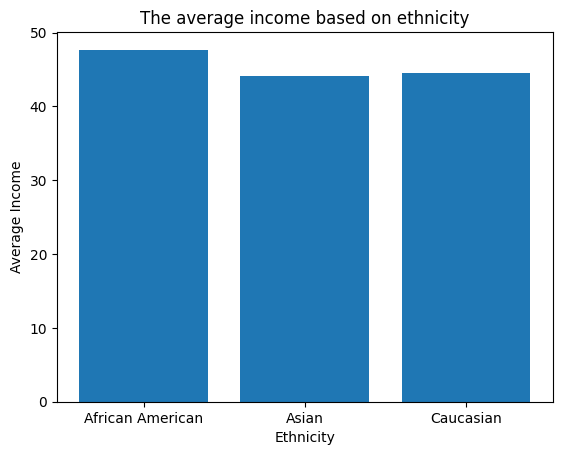

In [361]:
# Plotting a bar graph for a visual comparison of the average income based on ethnicity

plt.bar(ethnicity_average.index, ethnicity_average.Income)
plt.xlabel('Ethnicity')
plt.ylabel('Average Income')
plt.title('The average income based on ethnicity')

plt.show()


On average, do married or single people have a higher balance?

In [362]:
# Grouping married and single people and finding the average
married_average = df.groupby('Married').mean(numeric_only=True)

# Only having the Balance column
married_average.drop(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education'], inplace=True, axis=1)

print(married_average) # Single people have a slightly higher balance

           Balance
Married           
No       13.493509
Yes      13.388473


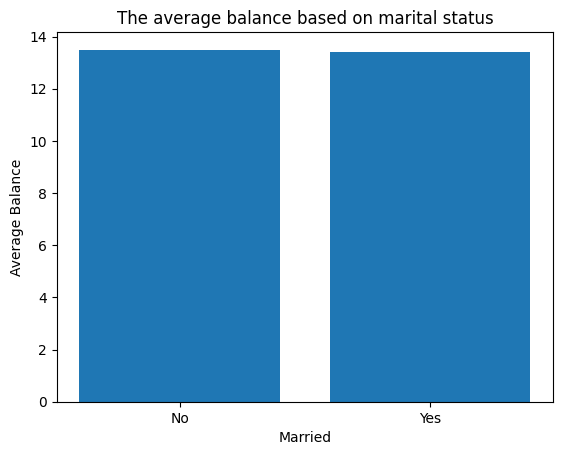

In [363]:
# Plotting a bar graph for a visual comparison of the average balance based on marital status

plt.bar(married_average.index, married_average.Balance)
plt.xlabel('Married')
plt.ylabel('Average Balance')
plt.title('The average balance based on marital status')

plt.show()

What is the highest income in our dataset?

In [364]:
highest_income = df['Income'].max()

print(f"The highest income in the dataset is: {highest_income:.2f}.")

The highest income in the dataset is: 186.63


What is the lowest income in our dataset?

In [365]:
lowest_income = df['Income'].min()
print(f"The lowest income in the dataset is {lowest_income:.2f}.")

The lowest income in the dataset is 10.35


How many cards do we have recorded in our dataset?

In [366]:
total_cards = df['Cards'].sum()

print(f"The total number of cards in the dataset is {total_cards}.")

The total number of cards in the dataset is 1183


How many females do we have information for vs how many males? 

In [367]:
# Making female_count and male_count variables to track the number of each and setting them to zero as a starting point
female_count = 0
male_count = 0

# Looping through each row in the Gender column and increasing count by one for every female and every male found and saving them in their respective variables
for gender in df['Gender']:
    if gender == 'Female':
        female_count += 1
    
    elif gender == 'Male':
        male_count += 1

print(f"There are {female_count} females in this dataset.")
print(f"There are {male_count} males in this dataset.")

There are 207 females in this dataset
There are 193 males in this dataset
